In [2]:
%matplotlib inline

In [3]:
index_file = '/Users/eczech/repos/portfolio/demonstrative/python/notebooks/paint_by_numbers/color_index/rgb_index.csv'
rgb_index = pd.read_csv(index_file)
rgb_index.head()

,letter,r,g,b
0,C,0.167501,0.127238,0.181714
1,H,0.490522,0.152973,0.092223
2,X,0.891883,0.804097,0.613262
3,M,0.537425,0.347009,0.232841
4,O,0.776520,0.330333,0.101629


In [11]:
from sklearn.decomposition import PCA
def sort_rgb_index(rgb_index):
    rgb_sorted = rgb_index.copy()
    pca = PCA(n_components=3)
    rgb_sorted['index'] = pca.fit_transform(rgb_sorted[['r', 'g', 'b']])[:,0]
    return rgb_sorted.sort('index')

rgb_df = sort_rgb_index(rgb_index).set_index('letter').sort('index')
rgb_df.head()

,r,g,b,index
letter,,,,
A,0.103776,0.080634,0.105808,-0.565931
B,0.213638,0.089836,0.103097,-0.490850
C,0.167501,0.127238,0.181714,-0.465114
D,0.331201,0.122686,0.106418,-0.392727
F,0.162770,0.284683,0.194055,-0.358005


In [12]:
rgb_sorted = []
for k, r in rgb_df.iterrows():
    v = r.to_dict()
    v['key'] = k
    rgb_sorted.append(v)
rgb_sorted[:3]

[{'b': 0.10580827029076237,
  'g': 0.080634150667902305,
  'index': -0.56593106570928986,
  'key': 'A',
  'r': 0.10377566377520084},
 {'b': 0.10309717691016053,
  'g': 0.089836371921539204,
  'index': -0.49084958071012441,
  'key': 'B',
  'r': 0.21363825778755524},
 {'b': 0.18171434759163335,
  'g': 0.12723825952093332,
  'index': -0.46511416366170605,
  'key': 'C',
  'r': 0.16750122826892419}]

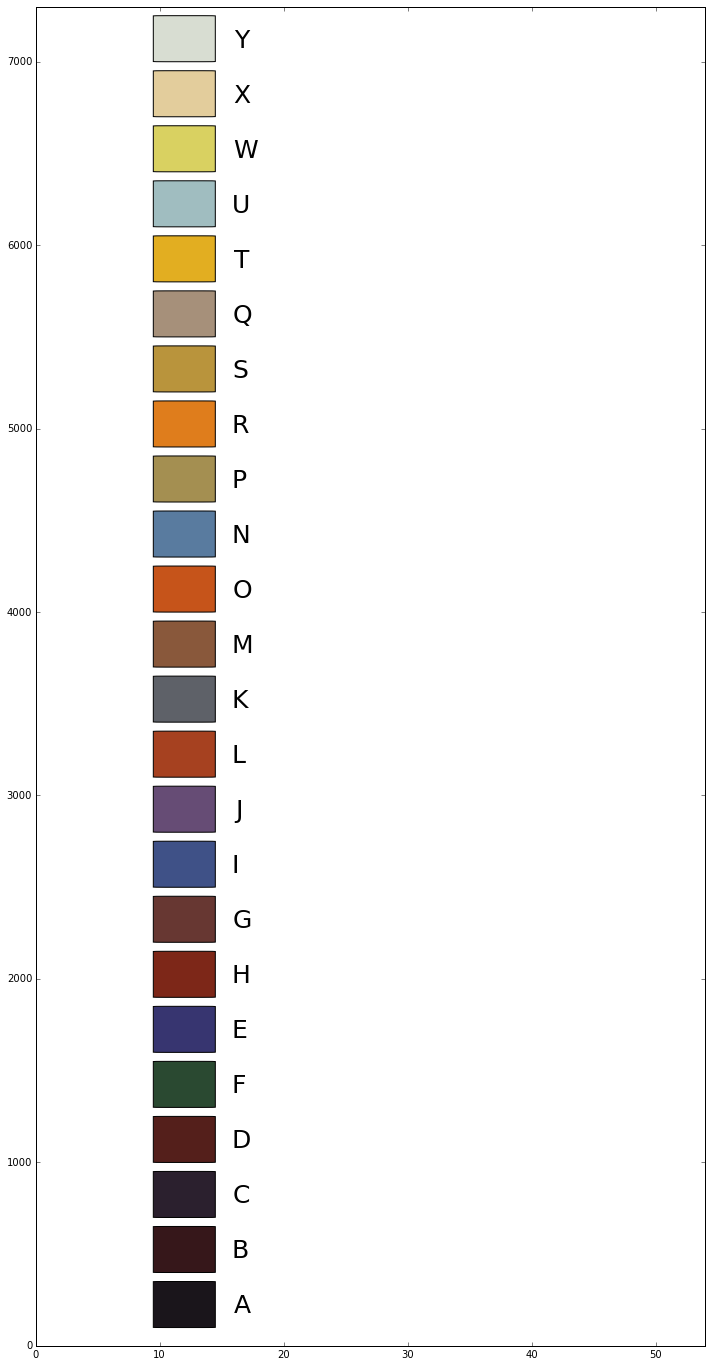

In [99]:
import matplotlib

n_colors = len(rgb_sorted)


swatch_height = 300
swatch_width = 4
vmargin = 50
vpad = vmargin / 2
width, height = swatch_width + 50, n_colors * swatch_height + 2 * vmargin

fig = plt.figure()
fig.set_size_inches((12, n_colors * 1))
ax = fig.add_subplot(111)

for i, color in enumerate(rgb_sorted):
    c = (color['r'], color['g'], color['b'])
    y = vmargin + i * swatch_height
    rect = matplotlib.patches.FancyBboxPatch((10, y + vmargin), swatch_width, 
                                             swatch_height - vmargin, fc=c, 
                                             boxstyle="round,pad=.5,rounding_size=1")
    ax.add_patch(rect)
    ax.text(12 + swatch_width, y + swatch_height/2 - 20, color['key'], fontsize=25)
plt.xlim([0, width])
plt.ylim([0, height])
fig.savefig('/tmp/swatch.png')